<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo_hpo_with_artifact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 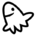 deepdriver hpo quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install deepdriver==0.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.7 MB/s eta 0:00:00
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=4f65b6e8cadfe1e1302de365bfc426d8d5bd2855bdb822527dbb47c86d2d34be
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Unin

In [3]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is i

#1. ➕ import deepdriver & deeplearnig framework



In [4]:
import tensorflow as tf

In [5]:
import deepdriver

#2. prepare dataset

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-01-12 07:40:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.9MB/s    in 3.8s    

2023-01-12 07:40:21 (17.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [ ]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [ ]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [ ]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [6]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")

#3. 🔌 log in to deepdriver

In [7]:
deepdriver.login(key="ZmIyNWQxNGJkMzUxYTVjODQ2NjM5NTgzOTM0YTM2OGE2ZmJiY2M2MWMwOWQ0OWFkNjU2YzNkM2UxMjA0YTVkZg==")

True

#4. 🥼 create hpo

In [8]:
experiment_name="cat_dog_cnn_hpo_exp4"

In [9]:
hpo_configuration = {
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "batch_size": {
            "values": [32,64,128]
        },
        "learning_rate": {
            "values": [10e-1,10e-2,10e-3,10e-4,10e-5]
        },
        "hidden_layer":{
            "values": [32,64,128]
        },
        "epoch" :{
            "values": [10]
        }

    }
}

In [10]:
# experiment init & config hyperparam
deepdriver.create_hpo(exp_name= experiment_name,hpo_config= hpo_configuration)

HPO initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Exp Url=/experi/molamola.python/cat_dog_cnn_hpo_exp4/exp/chart
optuna study aleady exist !


('success', 526)

#5. 📚 train your code and send log

make model

In [11]:
def define_model(hidden_layer, learning_rate):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  from tensorflow.keras.optimizers import RMSprop

  model.compile(optimizer=RMSprop(lr=learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])
  return model

In [12]:
def prepare_data(batch_size):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator( rescale = 1.0/255. )
  test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
  valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

  train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
  validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))

  test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))
  return train_generator, validation_generator, test_generator

In [ ]:
def train():
  import tensorflow as tf 
  print(deepdriver.config.Items())
  model = define_model(deepdriver.config.hidden_layer, deepdriver.config.learning_rate)
  
  train_generator, validation_generator, test_generator = prepare_data(deepdriver.config.batch_size)

  class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)

  steps_per_epoch = train_generator.n//deepdriver.config.batch_size
  validation_steps = validation_generator.n//deepdriver.config.batch_size

  history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)
  result = model.evaluate(test_generator)
  result_dict =dict(zip(model.metrics_names, result))
  print(result_dict)
  return result_dict["accuracy"]


In [ ]:
 deepdriver.run_hpo(exp_name=experiment_name, func=train, count=10)

DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-1
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-1/run/chart
[('batch_size', 128), ('learning_rate', 0.1), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
12/12 - 7s - loss: 2976978.5000 - accuracy: 0.4891 - val_loss: 0.7512 - val_accuracy: 0.4688 - 7s/epoch - 543ms/step
Epoch 2/10
12/12 - 5s - loss: 0.7249 - accuracy: 0.4851 - val_loss: 0.7153 - val_accuracy: 0.4609 - 5s/epoch - 438ms/step
Epoch 3/10
12/12 - 5s - loss: 0.7190 - accuracy: 0.4925 - val_loss: 0.7246 - val_accuracy: 0.5078 - 5s/epoch - 433ms/step
Epoch 4/10
12/12 - 5s - loss: 0.7510 - accuracy: 0.5027 - val_loss: 0.7255 - val_accuracy: 0.4922 - 5s/epoch - 429ms/step
Epoch 5/10
12/12 - 5s - loss: 0.7293 - accuracy: 0.5170 - val_loss: 0.7244 - val_accuracy: 0.5156 - 5s/epoch - 436ms/step
Epoch 6/10
12/12 - 5s - loss: 0.7351 - accuracy: 0.4939 - val_loss: 0.7380 - val_accuracy: 0.4922 - 5s/epoch - 444ms/step
Epoch 7/10
12/12 - 5s - loss: 0.7107 - accuracy: 0.5061 - val_loss: 0.7746 - val_accuracy: 0.4297 - 5s/epoch - 434ms/step
Epoch 8/10
12/12 - 5s - loss: 0.7312 - accuracy: 0.4966 - val_loss: 0.7871 - val_accuracy: 0.4766 - 5s/epoch - 435ms/step
Epoch 9/10
12/12 -

[I 2023-01-12 07:42:00,624] Trial 0 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 0.1, 'hidden_layer': 128, 'epoch': 10}. Best is trial 0 with value: 0.5.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-2
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-2/run/chart
[('batch_size', 128), ('learning_rate', 1.0), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 6s - loss: 74789634048.0000 - accuracy: 0.5156 - val_loss: 47.8825 - val_accuracy: 0.4531 - 6s/epoch - 536ms/step
Epoch 2/10
12/12 - 5s - loss: 904.0599 - accuracy: 0.5115 - val_loss: 23.3131 - val_accuracy: 0.5078 - 5s/epoch - 431ms/step
Epoch 3/10
12/12 - 5s - loss: 723.1649 - accuracy: 0.5183 - val_loss: 0.7111 - val_accuracy: 0.4922 - 5s/epoch - 433ms/step
Epoch 4/10
12/12 - 5s - loss: 487.0511 - accuracy: 0.5027 - val_loss: 1.8769 - val_accuracy: 0.5312 - 5s/epoch - 438ms/step
Epoch 5/10
12/12 - 5s - loss: 172.6395 - accuracy: 0.5163 - val_loss: 27.5390 - val_accuracy: 0.46

[I 2023-01-12 07:43:28,240] Trial 1 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 1.0, 'hidden_layer': 128, 'epoch': 10}. Best is trial 0 with value: 0.5.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-3
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-3/run/chart
[('batch_size', 32), ('learning_rate', 0.1), ('hidden_layer', 32), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 6s - loss: 194482.9219 - accuracy: 0.4837 - val_loss: 0.6931 - val_accuracy: 0.5104 - 6s/epoch - 126ms/step
Epoch 2/10
50/50 - 5s - loss: 0.6939 - accuracy: 0.5250 - val_loss: 0.7252 - val_accuracy: 0.4948 - 5s/epoch - 108ms/step
Epoch 3/10
50/50 - 5s - loss: 0.7008 - accuracy: 0.4800 - val_loss: 0.6935 - val_accuracy: 0.5000 - 5s/epoch - 109ms/step
Epoch 4/10
50/50 - 5s - loss: 0.6957 - accuracy: 0.5213 - val_loss: 0.6974 - val_accuracy: 0.4948 - 5s/epoch - 109ms/step
Epoch 5/10
50/50 - 5s - loss: 0.6970 - accuracy: 0.4913 - val_loss: 0.6930 - val_accuracy: 0.5104 - 5s/epoch - 11

[I 2023-01-12 07:44:44,053] Trial 2 finished with value: 0.5 and parameters: {'batch_size': 32, 'learning_rate': 0.1, 'hidden_layer': 32, 'epoch': 10}. Best is trial 0 with value: 0.5.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-4
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-4/run/chart
[('batch_size', 128), ('learning_rate', 0.001), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 6s - loss: 0.9484 - accuracy: 0.5027 - val_loss: 0.6731 - val_accuracy: 0.5703 - 6s/epoch - 526ms/step
Epoch 2/10
12/12 - 5s - loss: 0.6837 - accuracy: 0.5530 - val_loss: 0.6772 - val_accuracy: 0.6328 - 5s/epoch - 428ms/step
Epoch 3/10
12/12 - 5s - loss: 0.6657 - accuracy: 0.6264 - val_loss: 0.6531 - val_accuracy: 0.6328 - 5s/epoch - 431ms/step
Epoch 4/10
12/12 - 5s - loss: 0.6597 - accuracy: 0.6182 - val_loss: 0.6361 - val_accuracy: 0.7266 - 5s/epoch - 437ms/step
Epoch 5/10
12/12 - 5s - loss: 0.6361 - accuracy: 0.6488 - val_loss: 0.6374 - val_accuracy: 0.6328 - 5s/epoch - 438m

[I 2023-01-12 07:46:06,559] Trial 3 finished with value: 0.7049999833106995 and parameters: {'batch_size': 128, 'learning_rate': 0.001, 'hidden_layer': 64, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-5
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-5/run/chart
[('batch_size', 32), ('learning_rate', 1.0), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 6s - loss: 11231314944.0000 - accuracy: 0.5088 - val_loss: 0.6920 - val_accuracy: 0.5052 - 6s/epoch - 128ms/step
Epoch 2/10
50/50 - 5s - loss: 14123.1240 - accuracy: 0.4731 - val_loss: 0.7523 - val_accuracy: 0.4948 - 5s/epoch - 109ms/step
Epoch 3/10
50/50 - 5s - loss: 0.7335 - accuracy: 0.4944 - val_loss: 0.7301 - val_accuracy: 0.5000 - 5s/epoch - 108ms/step
Epoch 4/10
50/50 - 5s - loss: 0.7384 - accuracy: 0.4988 - val_loss: 0.7071 - val_accuracy: 0.5052 - 5s/epoch - 107ms/step
Epoch 5/10
50/50 - 5s - loss: 0.7326 - accuracy: 0.4950 - val_loss: 0.7812 - val_accuracy: 0.5052 - 5s/

[I 2023-01-12 07:47:10,705] Trial 4 finished with value: 0.5 and parameters: {'batch_size': 32, 'learning_rate': 1.0, 'hidden_layer': 128, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-6
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-6/run/chart
[('batch_size', 128), ('learning_rate', 1.0), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 6s - loss: 45290471424.0000 - accuracy: 0.4823 - val_loss: 5582.3403 - val_accuracy: 0.4453 - 6s/epoch - 530ms/step
Epoch 2/10
12/12 - 5s - loss: 1205.0889 - accuracy: 0.4823 - val_loss: 333.0693 - val_accuracy: 0.4922 - 5s/epoch - 432ms/step
Epoch 3/10
12/12 - 5s - loss: 75.8510 - accuracy: 0.5156 - val_loss: 0.6954 - val_accuracy: 0.4922 - 5s/epoch - 435ms/step
Epoch 4/10
12/12 - 5s - loss: 708.8008 - accuracy: 0.5034 - val_loss: 2.4356 - val_accuracy: 0.4766 - 5s/epoch - 435ms/step
Epoch 5/10
12/12 - 5s - loss: 1.0348 - accuracy: 0.5068 - val_loss: 0.6928 - val_accuracy: 0.51

[I 2023-01-12 07:48:48,013] Trial 5 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 1.0, 'hidden_layer': 128, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-7
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-7/run/chart
[('batch_size', 64), ('learning_rate', 0.01), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 10.3975 - accuracy: 0.5175 - val_loss: 0.6877 - val_accuracy: 0.5312 - 6s/epoch - 257ms/step
Epoch 2/10
25/25 - 5s - loss: 0.7245 - accuracy: 0.5275 - val_loss: 1.2091 - val_accuracy: 0.4896 - 5s/epoch - 215ms/step
Epoch 3/10
25/25 - 5s - loss: 0.7314 - accuracy: 0.4969 - val_loss: 0.6949 - val_accuracy: 0.5052 - 5s/epoch - 215ms/step
Epoch 4/10
25/25 - 5s - loss: 0.8560 - accuracy: 0.5175 - val_loss: 0.6962 - val_accuracy: 0.4948 - 5s/epoch - 216ms/step
Epoch 5/10
25/25 - 5s - loss: 0.6946 - accuracy: 0.4981 - val_loss: 0.6935 - val_accuracy: 0.5000 - 5s/epoch - 217m

[I 2023-01-12 07:49:57,861] Trial 6 finished with value: 0.5 and parameters: {'batch_size': 64, 'learning_rate': 0.01, 'hidden_layer': 128, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-8
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-8/run/chart
[('batch_size', 64), ('learning_rate', 0.0001), ('hidden_layer', 32), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 0.6967 - accuracy: 0.5088 - val_loss: 0.6885 - val_accuracy: 0.5729 - 6s/epoch - 257ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6855 - accuracy: 0.5675 - val_loss: 0.6827 - val_accuracy: 0.5625 - 5s/epoch - 215ms/step
Epoch 3/10
25/25 - 5s - loss: 0.6714 - accuracy: 0.5850 - val_loss: 0.6708 - val_accuracy: 0.5729 - 5s/epoch - 219ms/step
Epoch 4/10
25/25 - 5s - loss: 0.6571 - accuracy: 0.6175 - val_loss: 0.6685 - val_accuracy: 0.5885 - 5s/epoch - 216ms/step
Epoch 5/10
25/25 - 5s - loss: 0.6373 - accuracy: 0.6606 - val_loss: 0.6813 - val_accuracy: 0.5573 - 5s/epoch - 217m

[I 2023-01-12 07:51:07,374] Trial 7 finished with value: 0.6499999761581421 and parameters: {'batch_size': 64, 'learning_rate': 0.0001, 'hidden_layer': 32, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-9
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-9/run/chart
[('batch_size', 128), ('learning_rate', 1.0), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 6s - loss: 41330098176.0000 - accuracy: 0.4898 - val_loss: 1603032.5000 - val_accuracy: 0.4766 - 6s/epoch - 532ms/step
Epoch 2/10
12/12 - 5s - loss: 201669.5938 - accuracy: 0.4878 - val_loss: 4185.8594 - val_accuracy: 0.4844 - 5s/epoch - 430ms/step
Epoch 3/10
12/12 - 5s - loss: 1564.4374 - accuracy: 0.5102 - val_loss: 3643.4443 - val_accuracy: 0.4766 - 5s/epoch - 434ms/step
Epoch 4/10
12/12 - 5s - loss: 708.3522 - accuracy: 0.5442 - val_loss: 2384.3811 - val_accuracy: 0.4688 - 5s/epoch - 430ms/step
Epoch 5/10
12/12 - 5s - loss: 294.0309 - accuracy: 0.5401 - val_loss: 1025.6267 - 

[I 2023-01-12 07:52:34,458] Trial 8 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 1.0, 'hidden_layer': 64, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_exp4
Run Name=run-10
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_exp4/run-10/run/chart
[('batch_size', 32), ('learning_rate', 0.001), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 6s - loss: 0.7204 - accuracy: 0.5537 - val_loss: 0.6678 - val_accuracy: 0.5938 - 6s/epoch - 129ms/step
Epoch 2/10
50/50 - 6s - loss: 0.6457 - accuracy: 0.6381 - val_loss: 0.6188 - val_accuracy: 0.6354 - 6s/epoch - 110ms/step
Epoch 3/10
50/50 - 5s - loss: 0.5679 - accuracy: 0.7069 - val_loss: 0.5838 - val_accuracy: 0.6562 - 5s/epoch - 109ms/step
Epoch 4/10
50/50 - 6s - loss: 0.5183 - accuracy: 0.7387 - val_loss: 0.5678 - val_accuracy: 0.6823 - 6s/epoch - 112ms/step
Epoch 5/10
50/50 - 5s - loss: 0.4678 - accuracy: 0.7775 - val_loss: 0.5597 - val_accuracy: 0.6927 - 5s/epoch - 109

[I 2023-01-12 07:53:44,064] Trial 9 finished with value: 0.6850000023841858 and parameters: {'batch_size': 32, 'learning_rate': 0.001, 'hidden_layer': 64, 'epoch': 10}. Best is trial 3 with value: 0.7049999833106995.


True